In [1]:
from rossby_waves import *
from math import floor
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from rossby_waves.rossby_waves import amplitude, dispersion, grid, trajectory, vel, vel_den, trajectory_den
from matplotlib.animation import FuncAnimation, PillowWriter

In [2]:
#ro is RossbyOcean of grid of Rossbywaves, should be periodic
r = RossbyWave(np.array([5, 5]))
ro = RossbyOcean([r])
ro.add_grid_waves(beta=0.001)
ro.remove_wave(0)

In [18]:
#testing density
x, y, rho = trajectory_den(ro, grid(3, rho=2), 0, 0.05, 1/4000, eps=0.01)

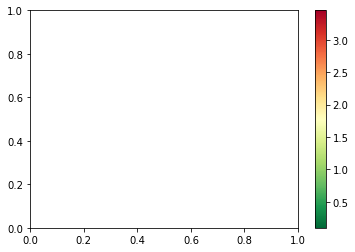

In [3]:
#testing animation with color
cmap = plt.cm.get_cmap('RdYlGn_r')
n = 100
x0 = grid(n, rho = 1)
x_list, y_list, rho_list = trajectory_den(ro, x0, 0, 0.05, 1/4000, eps=0.01)

r = sorted([rho[-1] for rho in rho_list])
M = r[floor(n*n*0.9)]
m = r[0]

fig, ax = plt.subplots(1)
ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))

def init_func():
    plt.cla()

def update_plot(i):
    plt.cla()

    x_traj = []
    for coord_list in x_list:
        x_traj.append(coord_list[i])
    y_traj = []
    for coord_list in y_list:
        y_traj.append(coord_list[i])
    rho = []
    for coord_list in rho_list:
        rho.append(coord_list[i])
    ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
    plt.scatter(x_traj, y_traj, c=rho, cmap=cmap, s=0.1, vmax=M, vmin=m)
    if i == 0:
        plt.colorbar()

anim = FuncAnimation(fig, update_plot, frames=np.arange(0, len(x_list[0])), init_func=init_func)

writergif = PillowWriter(fps=30)
anim.save('testing.gif', writer=writergif)

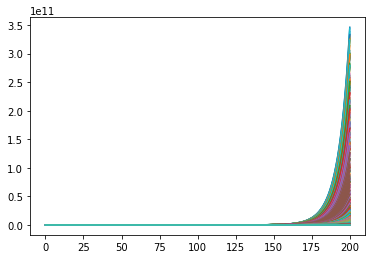

In [31]:
rho_last = [rho[-1] for rho in rho_list]
for l in rho_list:
    plt.plot(l)